In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv(f'https://drive.google.com/uc?id=1_BWt5EjvSw7wnN6mQDlHXv5L7-xj4Msl')
df

In [ ]:
df.info()

In [ ]:
display(df['Emotion'].unique())

In [ ]:
# Download stopwords (hanya pertama kali)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [ ]:
# =========================
# 1. Load dataset
# =========================
# Ganti path dengan lokasi dataset kamu
print(df.head())
print(df['Emotion'].value_counts())

/tmp/ipython-input-85697724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=df, order=df['Emotion'].value_counts().index, palette="Set2")


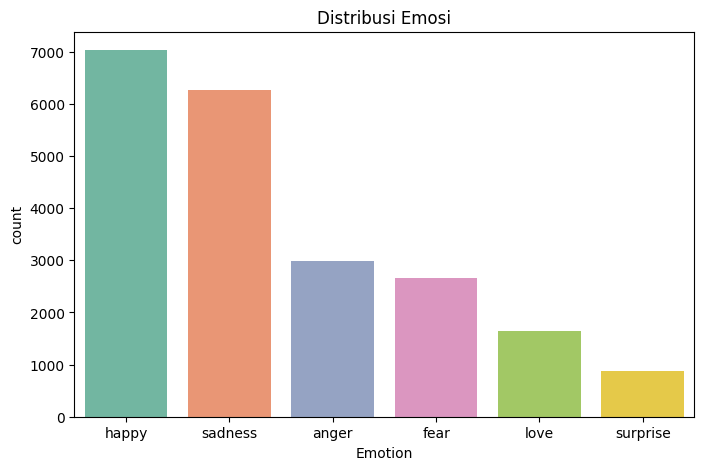

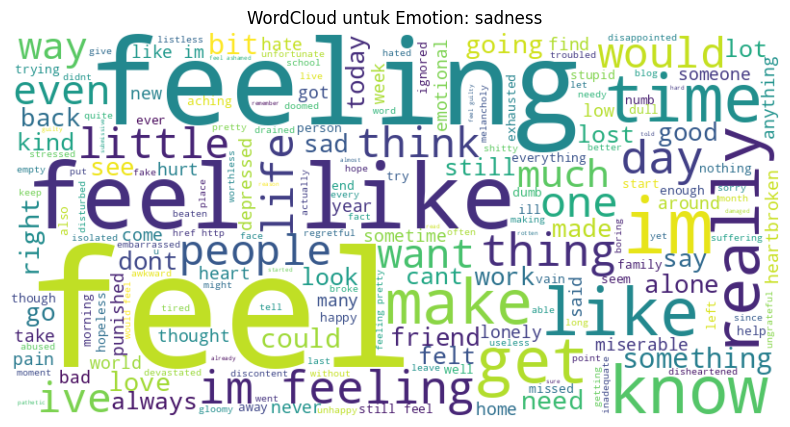

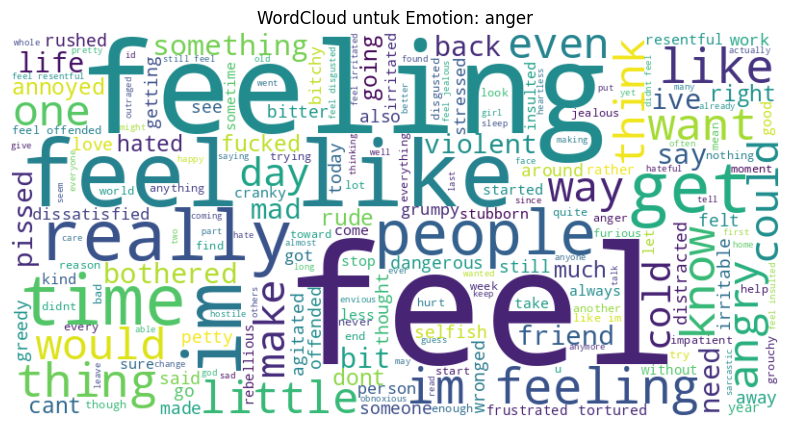

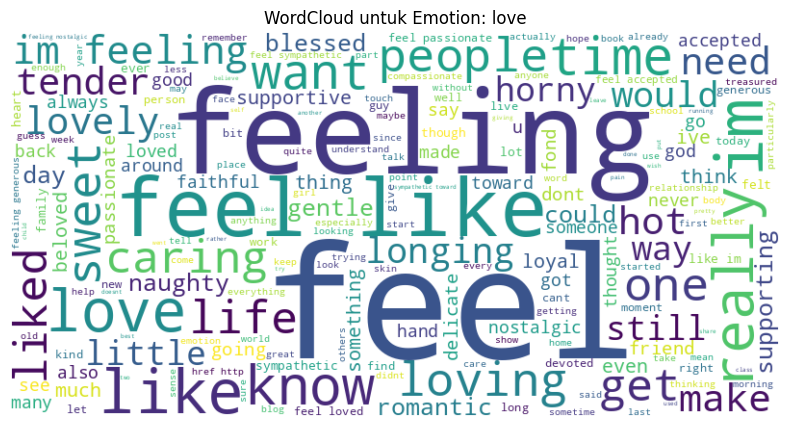

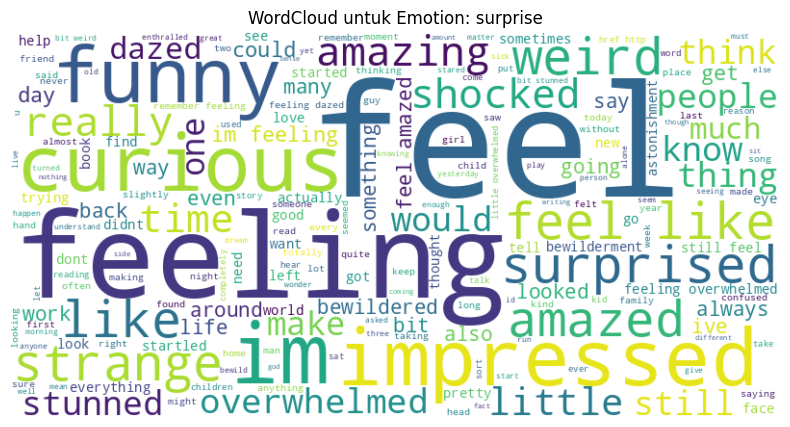

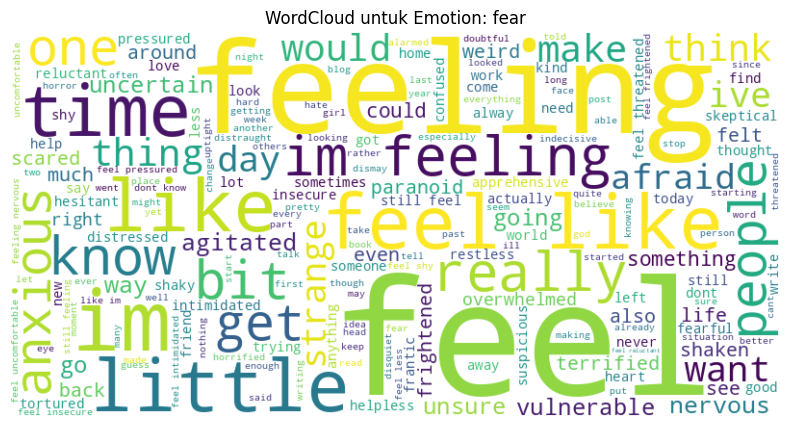

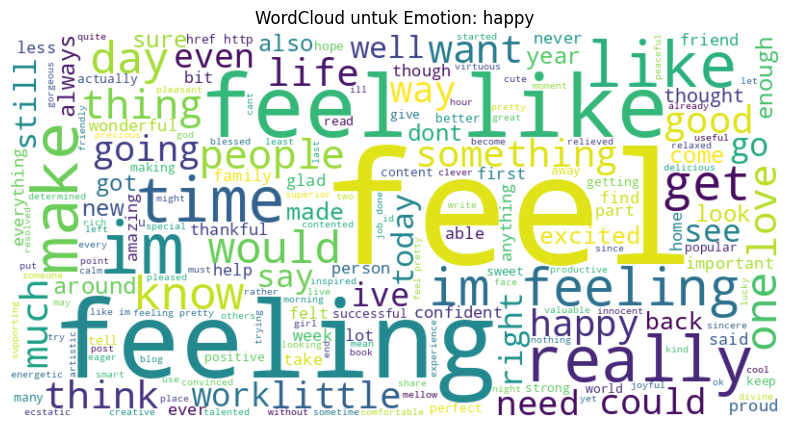

In [ ]:
# =========================
# 2. EDA
# =========================
plt.figure(figsize=(8,5))
sns.countplot(x="Emotion", data=df, order=df['Emotion'].value_counts().index, palette="Set2")
plt.title("Distribusi Emosi")
plt.show()

# Wordcloud per kelas
for emo in df['Emotion'].unique():
    text = " ".join(df[df['Emotion'] == emo]['Text'])
    wc = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud untuk Emotion: {emo}")
    plt.show()

In [ ]:
# ==============================
# Custom Stopwords (English)
# ==============================

# Daftar kata hubung, artikel, kata bantu, kata ganti umum dalam bahasa Inggris
custom_stopwords = {
    "a", "an", "the", "and", "or", "but", "so", "because", "since", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below",
    "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once",
    "i", "me", "my", "we", "our", "you", "your", "he", "him", "his",
    "she", "her", "it", "its", "they", "them", "their",
    "is", "am", "are", "was", "were", "be", "been", "being",
    "do", "does", "did", "doing", "have", "has", "had", "having"
}


In [ ]:
# =========================
# 3. Preprocessing
# =========================
def clean_text(text):
    text = text.lower()  # lowercase
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df['Clean_Text'] = df['Text'].apply(clean_text)

In [ ]:
# =========================
# 4. TF-IDF Vectorization
# =========================
tfidf = TfidfVectorizer(max_features=5000)  # batasi fitur biar ringan
X = tfidf.fit_transform(df['Clean_Text'])
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# =========================
# 5. MultinomialNB
# =========================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== MultinomialNB ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

=== MultinomialNB ===
Akurasi: 0.7327586206896551
              precision    recall  f1-score   support

       anger       0.91      0.52      0.66       599
        fear       0.86      0.45      0.59       530
       happy       0.68      0.97      0.80      1406
        love       0.93      0.16      0.28       328
     sadness       0.73      0.93      0.82      1253
    surprise       1.00      0.08      0.15       176

    accuracy                           0.73      4292
   macro avg       0.85      0.52      0.55      4292
weighted avg       0.78      0.73      0.69      4292



In [ ]:
# =========================
# 6. KNN dengan GridSearch
# =========================
params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["cosine", "euclidean", "manhattan"]
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("=== KNN Terbaik ===")
print("Best Params:", grid.best_params_)
best_knn = grid.best_estimator_

y_pred_knn = best_knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

/tmp/ipython-input-576731828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


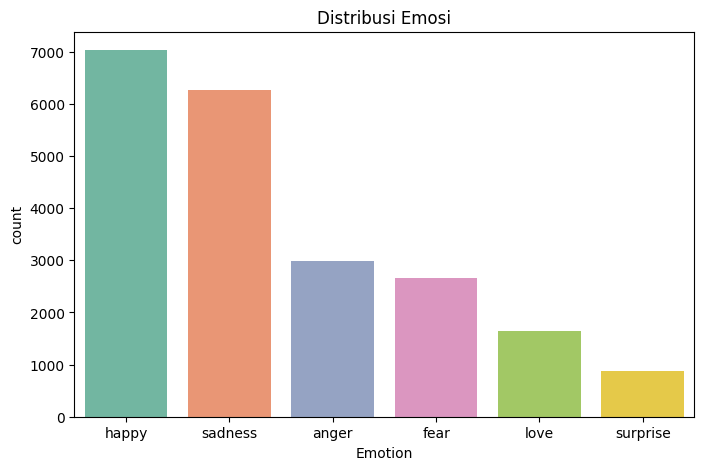

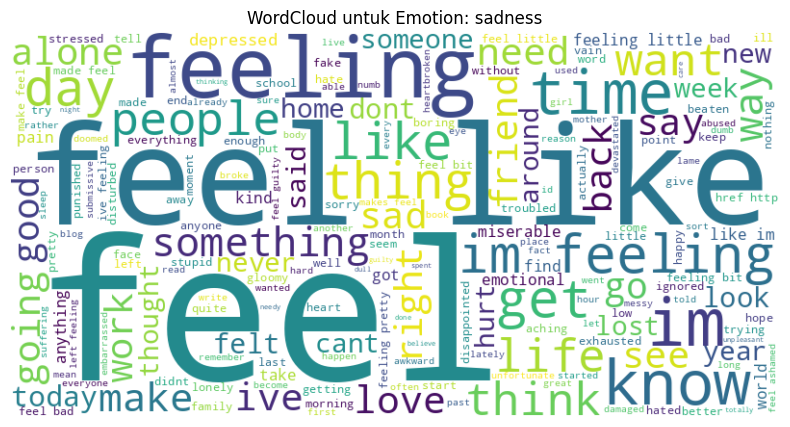

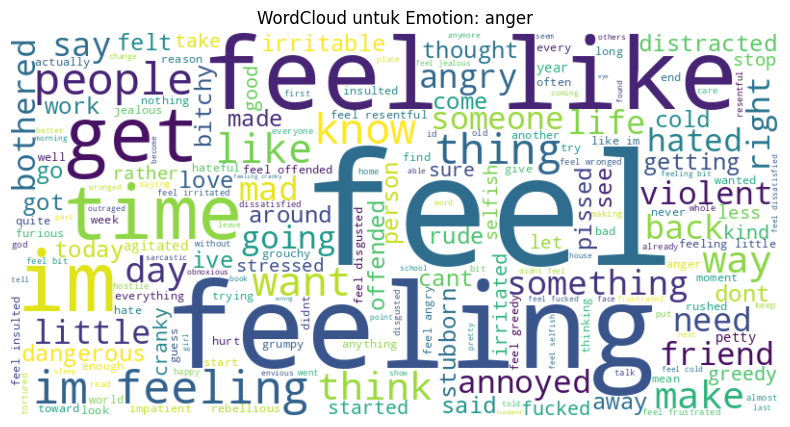

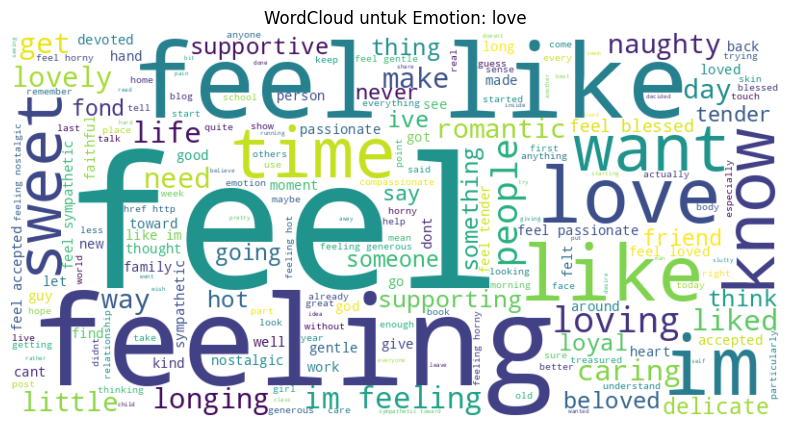

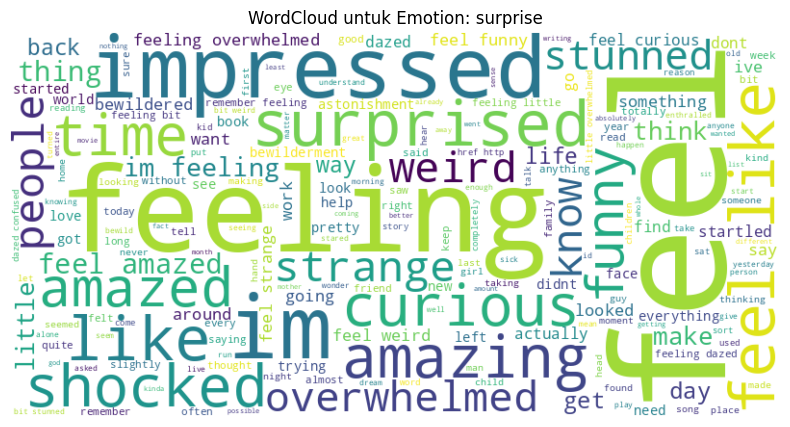

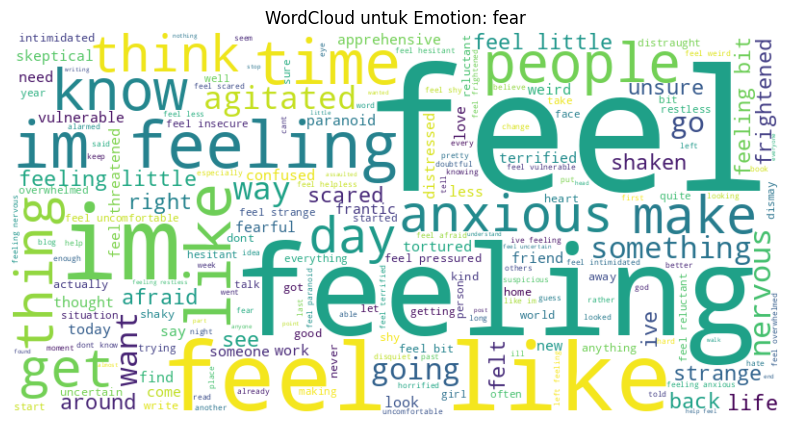

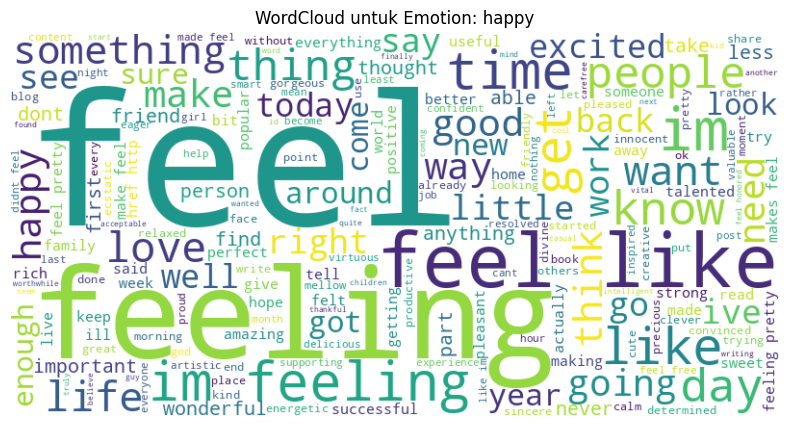